In [134]:
import numpy as np
from scipy.sparse.linalg import expm

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

import networkx as nx
from networkx import hypercube_graph
from networkx.drawing.nx_agraph import graphviz_layout

Visualizing Graph using <code>networkx</code> package

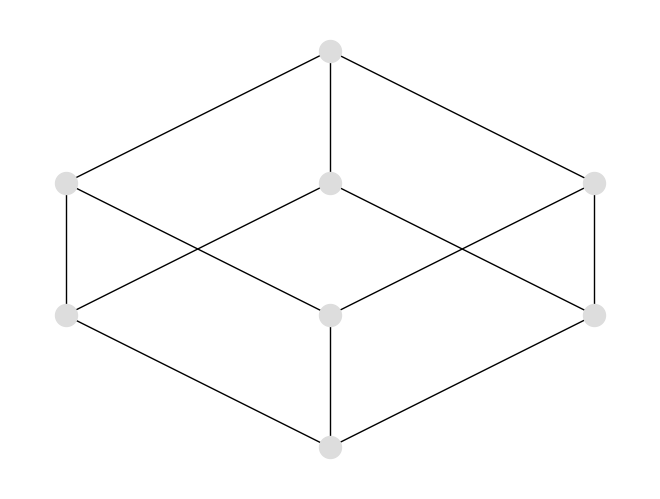

In [135]:
%matplotlib inline
n=3
G = hypercube_graph(n)
A = nx.adjacency_matrix(G)
# Draw graph
nx.draw(G, pos=graphviz_layout(G, prog="dot"), node_color="#dddddd", node_size=250, with_labels=False)
plt.show()

Note: matrix exponentials are done using the <a href="https://en.wikipedia.org/wiki/Pad%C3%A9_approximant">Padé approximation</url>.

## Classical Random Walk

Note that even for irregular graphs, the steady state probability vector is the uniform vector $(1,\dots, 1)/|V|$.

In [136]:
# A is adjacency matrix, L is Laplacian as indicated in lecture notes.
L = A.copy()
for i in range(A.shape[0]):
    L[i,i] = -len(A[[i], :].nonzero()[0])

# Classical Continuous Random Walk
# time slider
t = 1
# Set initial location to be "0" node
p0 = np.zeros(L.shape[0])
p0[0] = 1
pt = expm(L*t) @ p0
pt

c:\Users\akyap\anaconda3\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


array([0.18292894, 0.13931761, 0.13931761, 0.10610348, 0.13931761,
       0.10610348, 0.10610348, 0.08080779])

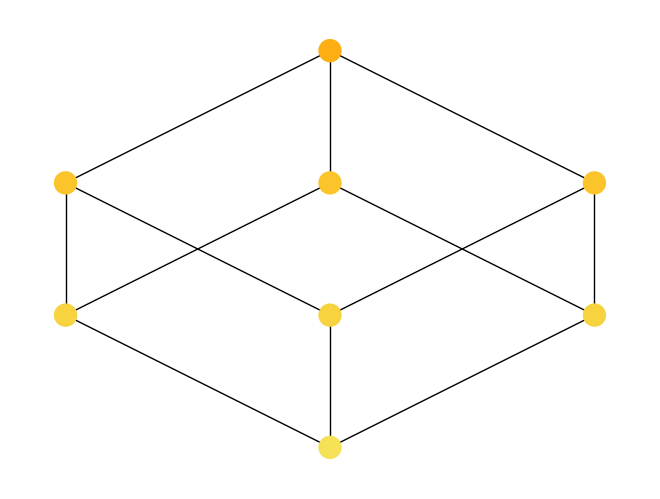

In [137]:
# Colormap
norm = Normalize(vmin=0, vmax=1)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)

nx.draw(
    G, 
    pos=graphviz_layout(G, prog="dot"), 
    node_color=[mapper.to_rgba(pt[i]) for i in range(len(pt))], 
    node_size=250, 
    with_labels=False
)

## Quantum

In [138]:
# Quantum Walk
# time slider
t = np.pi/2
# Set initial location to be "0" node
psi0 = np.zeros(A.shape[0])
psi0[0] = 1
psit = expm(-1j * A *t) @ p0
pquant = np.abs(psit)**2
pquant

array([3.77482269e-32, 3.77482269e-32, 4.81482486e-33, 6.93334780e-33,
       4.81482486e-33, 4.81482486e-33, 3.08148791e-33, 1.00000000e+00])

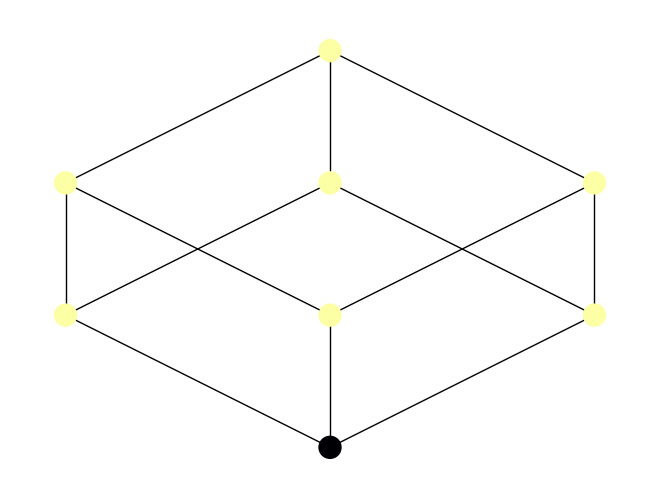

In [139]:
# Colormap
norm = Normalize(vmin=0, vmax=1)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.inferno_r)

nx.draw(
    G, 
    pos=graphviz_layout(G, prog="dot"), 
    node_color=[mapper.to_rgba(pquant[i]) for i in range(len(pquant))], 
    node_size=250, 
    with_labels=False
)